In [1]:
import gym
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.distributions as distributions

import matplotlib.pyplot as plt
import numpy as np
import gym
from tqdm import tqdm
import random

In [2]:
train_env = gym.make('Humanoid-v2')
test_env = gym.make('Humanoid-v2')

SEED = 333

train_env.seed(SEED);
test_env.seed(SEED+1);
np.random.seed(SEED);
random.seed(SEED)
torch.manual_seed(SEED);

Run: 0:   0%|                                         | 0/10000 [00:00<?, ?it/s]

Creating window glfw


Run: 0: 100%|█████████████████████████████| 10000/10000 [18:27<00:00,  9.03it/s]


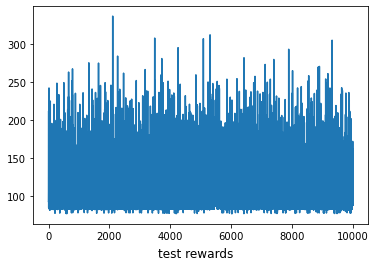

In [3]:
n_runs = 1
n_episodes = 10000
test_rewards = np.zeros((n_runs, n_episodes))
dataset_generated = np.zeros((n_episodes, 393))


for run in range(n_runs):
    for episode in tqdm(range(n_episodes), desc=f'Run: {run}'):
        done = False
        episode_reward = 0
        test_env.reset()
        while not done:
            action = test_env.action_space.sample() # your agent here (this takes random actions)
            observation, reward, done, info = test_env.step(action)
            if reward>0:
                dataset_generated[episode][:376]=observation
                dataset_generated[episode][376:]=action
            test_env.render()
            episode_reward+=reward
        test_rewards[run][episode] = episode_reward
      
    plt.figure()
    plt.plot(test_rewards[run])
    plt.figtext(0.5, 0.01, "test rewards", wrap=True, horizontalalignment='center', fontsize=12)
    plt.show()
    np.savetxt('data_state_action_RL.csv', dataset_generated, delimiter=',')

test_env.close()